In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

datafile = '../../../challenges_data/2013_movies.csv'

df = pd.read_csv(datafile)

df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'])
print df.head()

                             Title     Budget  DomesticTotalGross  \
0  The Hunger Games: Catching Fire  130000000           424668047   
1                       Iron Man 3  200000000           409013994   
2                           Frozen  150000000           400738009   
3                  Despicable Me 2   76000000           368061265   
4                     Man of Steel  225000000           291045518   

                    Director Rating  Runtime ReleaseDate  
0           Francis Lawrence  PG-13      146  2013-11-22  
1                Shane Black  PG-13      129  2013-05-03  
2     Chris BuckJennifer Lee     PG      108  2013-11-22  
3  Pierre CoffinChris Renaud     PG       98  2013-07-03  
4                Zack Snyder  PG-13      143  2013-06-14  


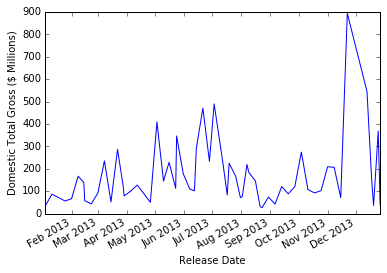

In [40]:
# Challenge 1

dtg_series = df.groupby('ReleaseDate').sum()['DomesticTotalGross'].sort_index()
dtg_series /= 1e6

dtg_series.plot.line()
plt.xlabel('Release Date')
plt.ylabel('Domestic Total Gross ($ Millions)')
plt.show()


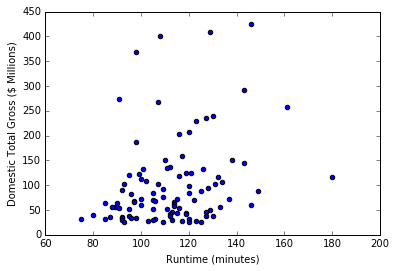

In [42]:
# Challenge 2

df.head()
plt.scatter(df['Runtime'], df['DomesticTotalGross']/1e6)

plt.xlabel('Runtime (minutes)')
plt.ylabel('Domestic Total Gross ($ Millions)')
plt.show()